Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

Loading data

In [10]:
df = pd.read_csv('datasets\Clean_Dataset.csv',index_col=0)
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


EDA

In [11]:
df.shape

(300153, 11)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 27.5+ MB


In [13]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [14]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [15]:
features = df.drop('price', axis=1)
label = df['price']

In [16]:
features.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1


In [17]:
#Airline distribution
airline_distribution = df['airline'].value_counts()
airlines = df['airline'].unique()
print("Number of airlines per class:")
print(airline_distribution)

Number of airlines per class:
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64


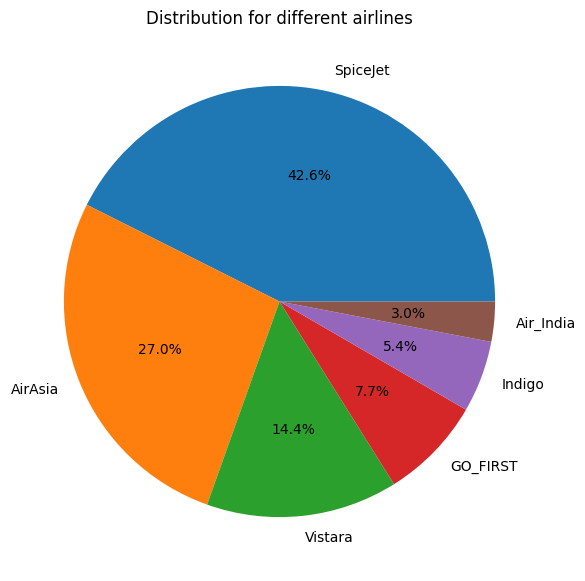

In [22]:
# making a pie chart for visual representation of class distribution
plt.figure(figsize=(7, 7))
plt.pie(airline_distribution, labels=airlines, autopct="%1.1f%%")
plt.title("Distribution for different airlines")
plt.show()

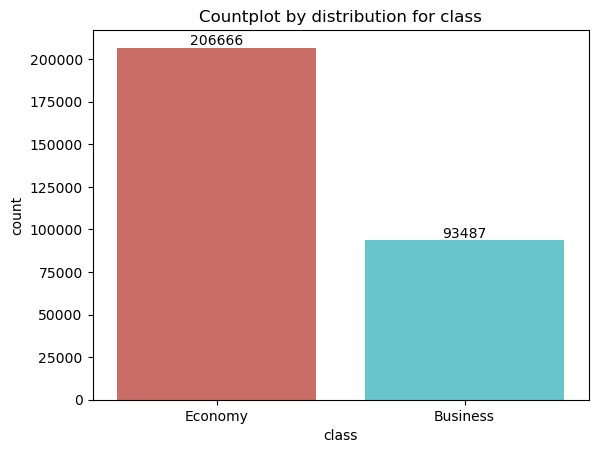

In [18]:
ax = sns.countplot(x=df['class'], data=df, palette='hls')
ax.bar_label(ax.containers[0])
plt.title('Countplot by distribution for class')
plt.show()

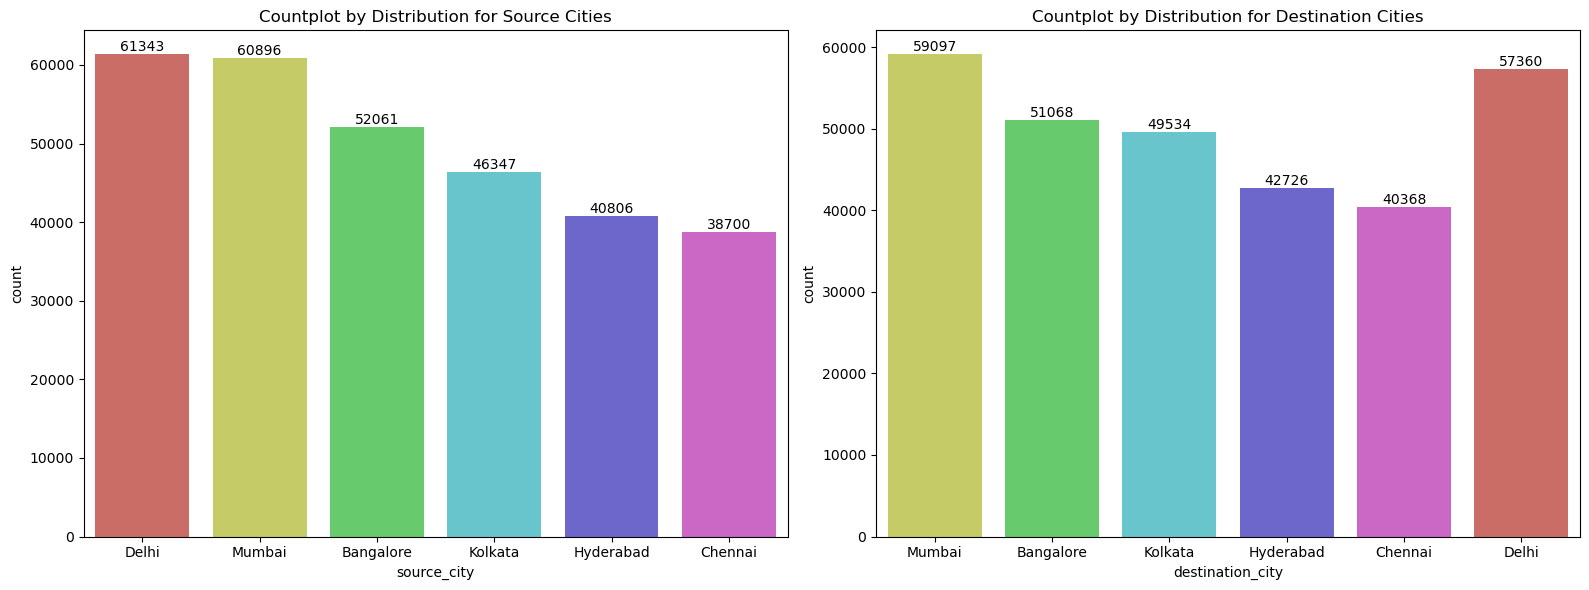

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
cities = pd.concat([df['source_city'], df['destination_city']]).unique()

# Create a color palette based on the number of unique cities
palette = sns.color_palette('hls', len(cities))
city_color_map = dict(zip(cities, palette))

ax1 = sns.countplot(x=df['source_city'], data=df, palette=[city_color_map[city] for city in df['source_city'].unique()], ax=axs[0])
axs[0].set_title('Countplot by Distribution for Source Cities')
ax1.bar_label(ax1.containers[0])

ax2 = sns.countplot(x=df['destination_city'], data=df, palette=[city_color_map[city] for city in df['destination_city'].unique()], ax=axs[1])
axs[1].set_title('Countplot by Distribution for Destination Cities')

ax2.bar_label(ax2.containers[0])
plt.tight_layout()
plt.show()

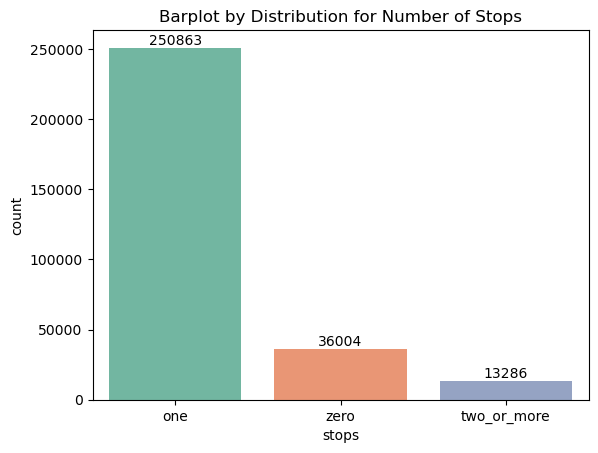

In [21]:
#Calculate the count of each category in 'stops'
stops_count = df['stops'].value_counts().reset_index()
stops_count.columns = ['stops', 'count']

#Creating barplot
ax = sns.barplot(x='stops', y='count', data=stops_count, palette = 'Set2')
ax.bar_label(ax.containers[0])
plt.title('Barplot by Distribution for Number of Stops')
plt.show()


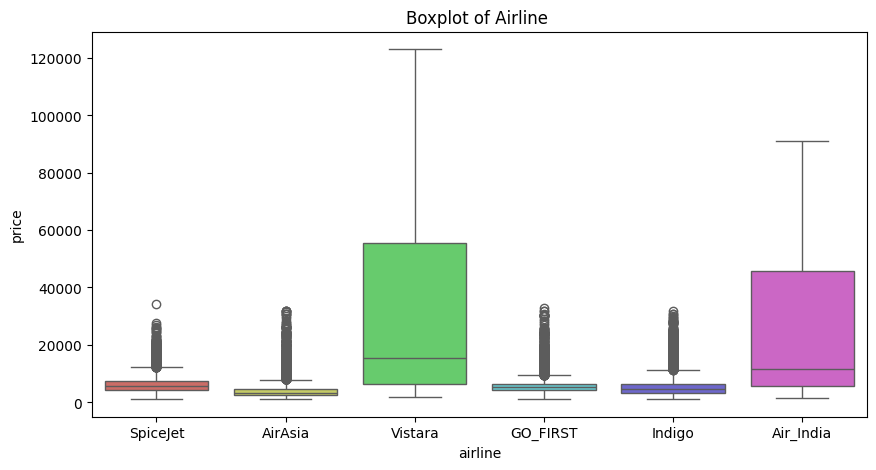

In [39]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['airline'], y="price", data=df, palette = 'hls')
plt.title(f'Boxplot of Airline ')
plt.show()


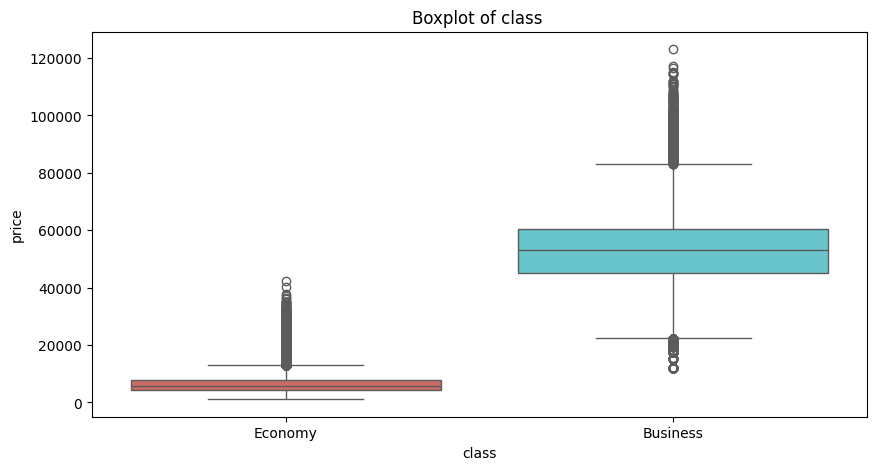

In [41]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['class'], y="price", data=df, palette = 'hls')
plt.title(f'Boxplot of class ')
plt.show()

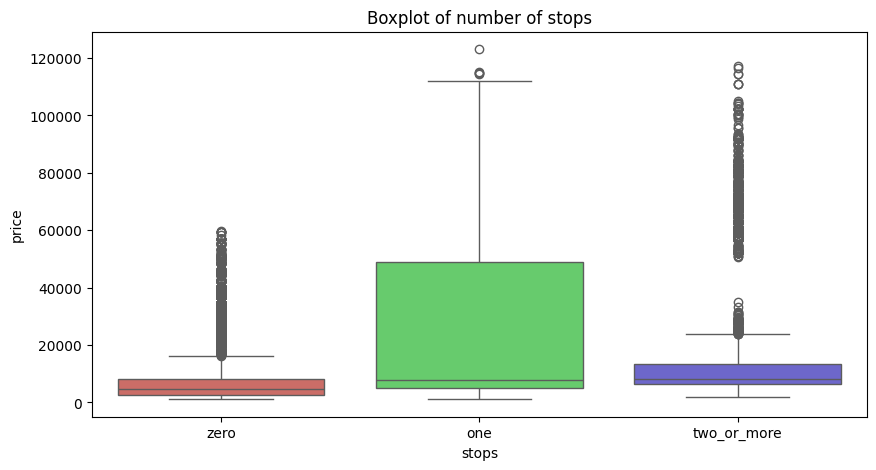

In [42]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['stops'], y="price", data=df, palette = 'hls')
plt.title(f'Boxplot of number of stops')
plt.show()

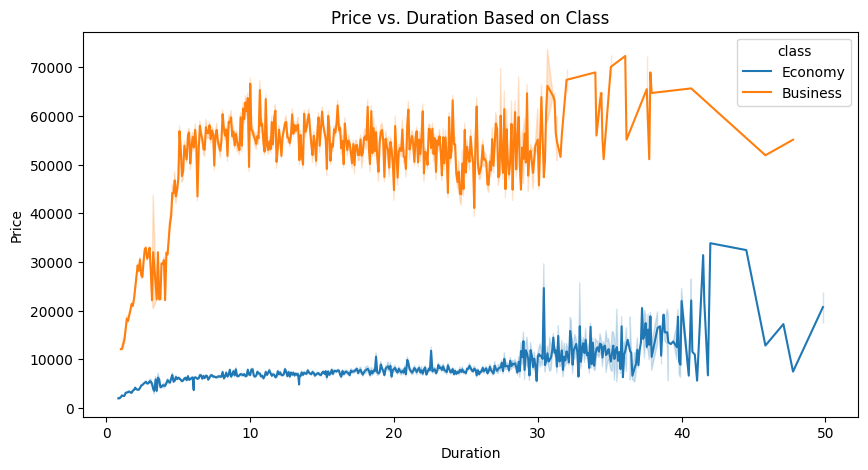

In [51]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='duration', y='price', hue='class', data=df)
plt.title('Price vs. Duration Based on Class')
plt.xlabel('Duration')
plt.ylabel('Price')
plt.show()

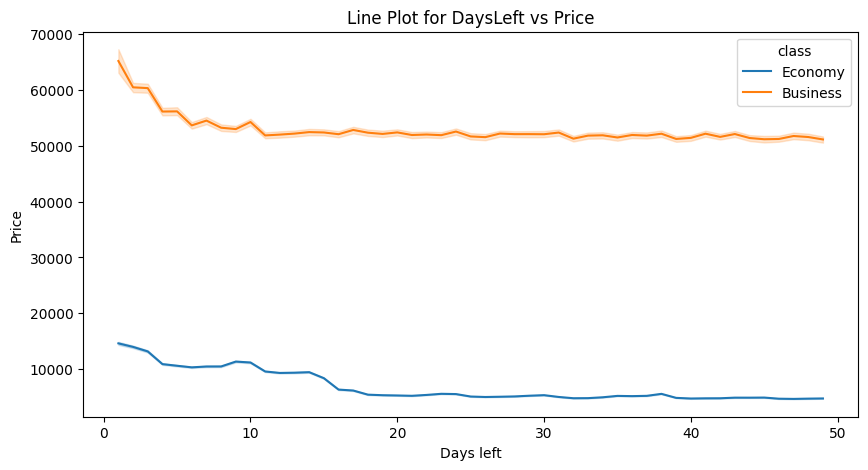

In [53]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='days_left', y='price', hue='class', data=df)
plt.title('Line Plot for DaysLeft vs Price')
plt.xlabel('Days left')
plt.ylabel('Price')
plt.show()

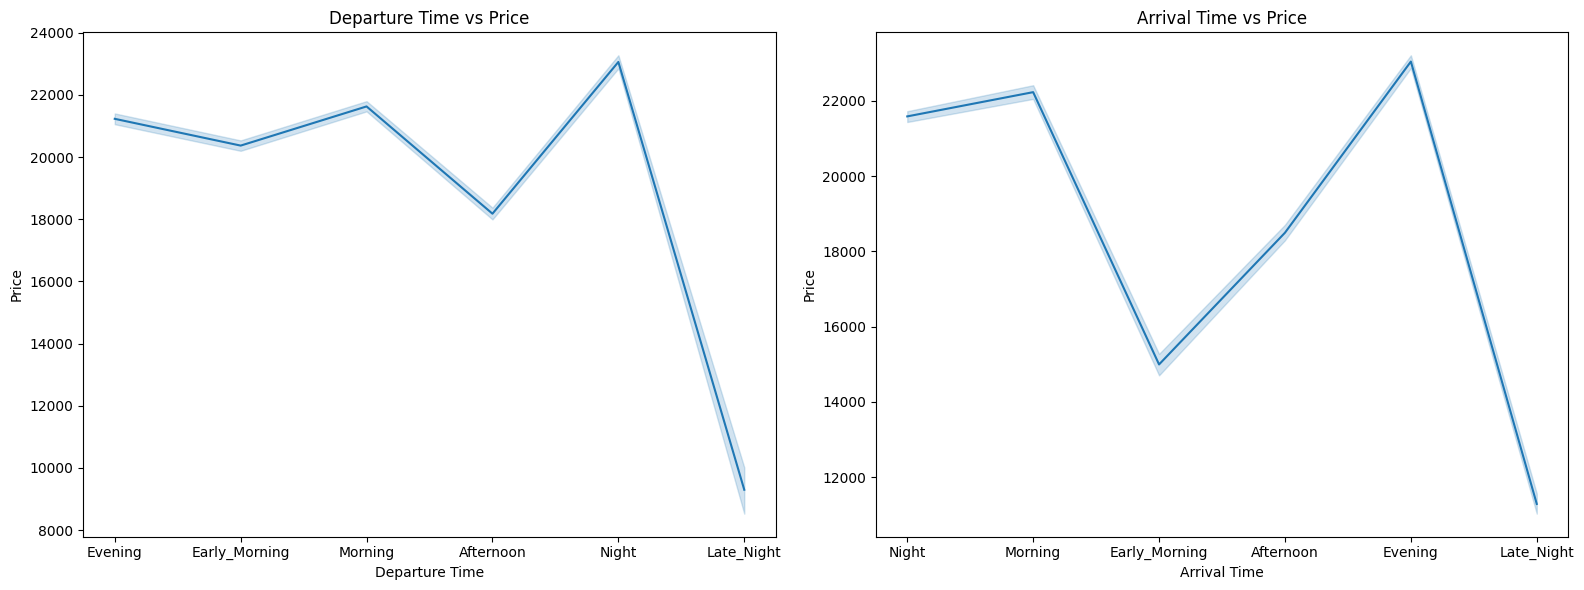

In [55]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Lineplot for departure time vs price
sns.lineplot(x='departure_time', y='price', data=df, ax=axs[0], palette = 'Set2')
axs[0].set_title('Departure Time vs Price')
axs[0].set_xlabel('Departure Time')
axs[0].set_ylabel('Price')

# Lineplot for arrival time vs price
sns.lineplot(x='arrival_time', y='price', data=df, ax=axs[1], palette = 'Set2')
axs[1].set_title('Arrival Time vs Price')
axs[1].set_xlabel('Arrival Time')
axs[1].set_ylabel('Price')

plt.tight_layout()
plt.show()


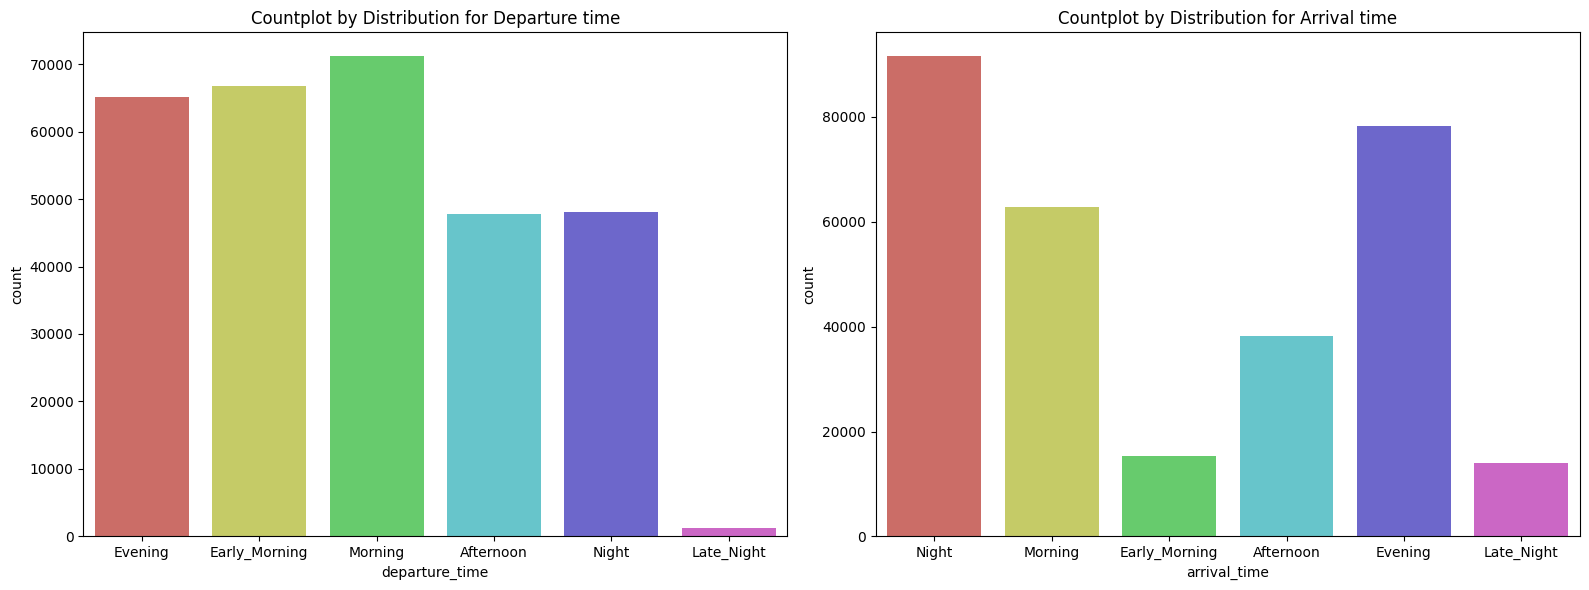

In [56]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

sns.countplot(x=df['departure_time'], data=df, palette='hls', ax=axs[0])
axs[0].set_title('Countplot by Distribution for Departure time')

sns.countplot(x=df['arrival_time'], data=df, palette='hls', ax=axs[1])
axs[1].set_title('Countplot by Distribution for Arrival time')

plt.tight_layout()
plt.show()

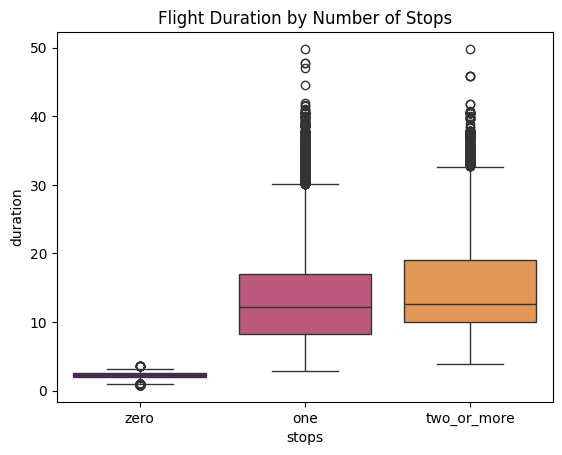

In [63]:
sns.boxplot(x='stops', y='duration', data=df, palette='plasma')
plt.title('Flight Duration by Number of Stops')
plt.show()


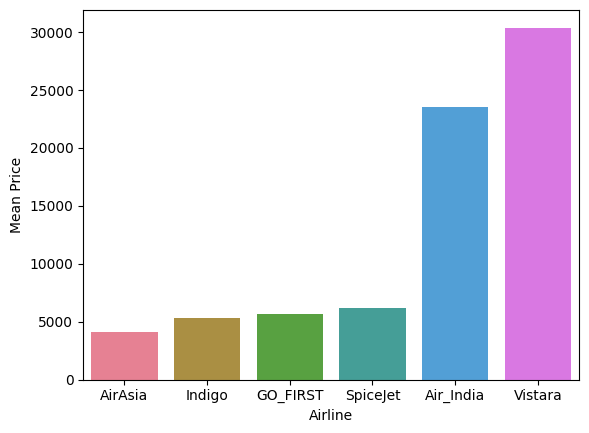

In [72]:
mean_price = df.groupby('airline')['price'].mean().reset_index()
mean_price = mean_price.sort_values(by='price',ascending = True)
sns.barplot(x='airline', y='price', data=mean_price,palette = 'husl')

plt.xlabel('Airline')
plt.ylabel('Mean Price')
plt.show()